<a href="https://colab.research.google.com/github/Ayman947/Customer-Churn-Prediction/blob/main/Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size="10">📱👪📉 Telecom Customer Churn Prediction</font>

## **1. Business Understanding** 

**Background:** 
- Customer churn is the tendency of customers to cancel their subscriptions to a service they have been using.
- Customer churn rate is the percentage of churned customers within a predefined time interval.
- Churn rate is a very important indicator of customer satisfaction and the overall business wellness of the company.



**Problem:** 
- At the telecom company, the marketing department detected that they are losing many of their customers (i.e. high churn rate).
- So, they decided to launch retention campaigns, and to be efficient they need to target just the customers who have the tendency to churn.

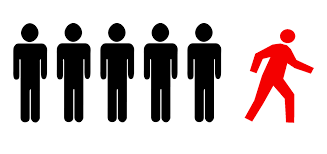

**Objective:** To determine the customers' tendency to churn.

**Question:** Who will churn and who will not?

**Analytics Solution / Methodology:** A supervised ML classification models will be built to predict the churn status of every customer.

## **2. Data Understanding**

### 2.1 Importing packages

In [80]:
#######################
# importing packages ##
#######################
! pip install eli5
! pip install imblearn
import eli5
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, roc_auc_score, plot_roc_curve, f1_score
sns.despine()
sns.set(style='darkgrid')
warnings.filterwarnings("ignore")
pd.set_option('max_columns', None)
np.set_printoptions(suppress=True, linewidth=100, precision=5)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Figure size 432x288 with 0 Axes>

### 2.2 Collecting Data

In [83]:
#####################
## Collecting Data ##
#####################
df_raw = pd.read_csv('01 data-raw.csv')
df_raw.shape

(7043, 21)

In [84]:
#####################
## Inspecting Data ##
#####################
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df_raw)

,column,dtypes,nunique,sum_null
0,customerID,object,7043,0
1,gender,object,2,0
2,SeniorCitizen,int64,2,0
3,Partner,object,2,0
4,Dependents,object,2,0
5,tenure,int64,73,0
6,PhoneService,object,2,0
7,MultipleLines,object,3,0
8,InternetService,object,3,0
9,OnlineSecurity,object,3,0


### 2.3 Data Dictionary

- **About:** The data set includes information about customers who left within the last month, services that each customer has signed up for, customer account information and demographic info about customers.

- **Rows:** 7,043 customers.

- **Columns:** 21 features.

- **Data Dictionary:**

| Column Name | Description | Sample Values |
|-------------|-------------|---------------|
| customerID       | The customer's unique identifier  | 7590-VHVEG |
| gender      | The customer's gender  | Male, Female |
| SeniorCitizen          | Indicates if the customer is 65 or older  | 0, 1 |
| Dependents | Indicates if the customer lives with any dependents  | Yes, No |
| tenure | Indicates the total amount of months that the customer has been with the company | 1, 5 or 10 or ... etc. |
| PhoneService | Indicates if the customer subscribes to home phone service   | Yes, No |
| MultipleLines | Indicates if the customer subscribes to multiple lines  service | Yes, No, No phone service |
| InternetService          | Indicates if the customer subscribes to Internet service  | No, DSL, Fiber Optic |
| OnlineSecurity          | Indicates if the customer subscribes to an additional online security service  | Yes, No, No internet service |
| OnlineBackup          | Indicates if the customer subscribes to an additional online backup  | Yes, No, No internet service |
| DeviceProtection          | Indicates if the customer subscribes to an additional device protection  | Yes, No, No internet service |
| TechSupport          | Indicates if the customer subscribes to an additional technical support  | Yes, No, No internet service |
| StreamingTV          | Indicates if the customer uses their Internet service to stream television  | Yes, No, No internet service |
| StreamingMovies          | Indicates if the customer uses their Internet service to stream movies  | Yes, No, No internet service |
| Contract          | Indicates the customer’s current contract type  | Month-to-Month, One Year, Two Year |
| PaperlessBilling          | Indicates if the customer has chosen paperless billing  | Yes, No |
| PaymentMethod | Indicates how the customer pays their bill  | Bank Withdrawal, Credit Card, Mailed Check |
| MonthlyCharges | Indicates the customer’s current total monthly charge  | 29.85 |
| TotalCharges | Indicates the customer’s total charges  | 1889.5 |
| Churn          | Indicates if the customer churned within the last month or not   | Yes, No |

## **3. Data Preparation**

### 3.1 Data Cleaning

In [85]:
# dropping the customer ids column
df_raw.drop( 'customerID', axis=1, inplace= True )

In [86]:
# adjusting the total charges column data type 
df_raw['TotalCharges'] = pd.to_numeric(df_raw['TotalCharges'], errors='coerce')

In [87]:
# checking categorical classes
cat_cols = df_raw.select_dtypes(exclude='number').columns
for col in cat_cols:
  print(f'({col}):\n{df_raw[col].value_counts()}\n\n');

(gender):
Male      3555
Female    3488
Name: gender, dtype: int64


(Partner):
No     3641
Yes    3402
Name: Partner, dtype: int64


(Dependents):
No     4933
Yes    2110
Name: Dependents, dtype: int64


(PhoneService):
Yes    6361
No      682
Name: PhoneService, dtype: int64


(MultipleLines):
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


(InternetService):
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


(OnlineSecurity):
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


(OnlineBackup):
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


(DeviceProtection):
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


(TechSupport):
No                     3473
Yes            

In [88]:
# dealing with duplicates
df_raw.drop_duplicates(inplace=True)
df_raw.duplicated().value_counts()

False    7021
dtype: int64

In [89]:
# checking for Nulls
df_raw.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [90]:
# dealing with nulls
df_raw['TotalCharges'] = df_raw['TotalCharges'].fillna(df_raw['TotalCharges'].mean())

In [91]:
# exporting clean data to a CSV file
df_raw.to_csv('02 data-cleaned.csv', index=False)
df_cleaned = df_raw

### 3.2 Data Preprocessing

In [92]:
####################
## Data Shuffling ##
####################
## To avoid any unintended order, especially the chronological one even if it is implicit.
## As a result the data will be spread out representing the randomness in our data.

df_shuffled = df_cleaned.sample(frac = 1, random_state=96)

In [93]:
#######################################
## Assigning inputs (X) & target (y) ##
#######################################

X = df_shuffled.drop(['Churn'], axis=1)
y = df_shuffled[['Churn']]

In [94]:
######################
## One-Hot-Encoding ##
######################

categorical_inputs = X.select_dtypes(include=['object'])

def dummy(df, cols_list):
    for col in cols_list:
        x = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df.drop( [col], axis=1, inplace= True)
        df = pd.concat( [df, x], axis = 1)
    return df

X = dummy(X, categorical_inputs)
y = dummy(y, y.columns)

In [95]:
##################################################
## Splitting the data into training and testing ##
##################################################
## This is to avoid over-fitting (i.e overcome the effect of noise data)
## This makes the model generalized to be applied on OutOfSample data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)
print("*****"*10)
print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')
print("*****"*10)

**************************************************
Total # of sample in whole dataset: 7021
**************************************************
Total # of sample in train dataset: 5616
Shape of X_train: (5616, 30)
**************************************************
Total # of sample in test dataset: 1405
Shape of X_test: (1405, 30)
**************************************************


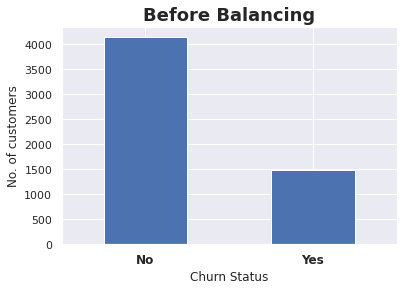

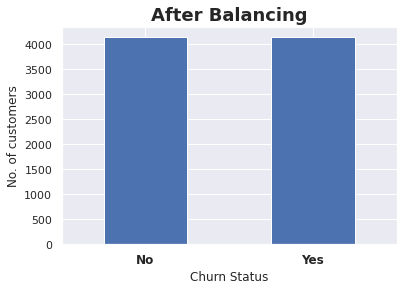

In [96]:
###########################################
## Balancing the target variable classes ##
###########################################
## To avoid any potential bias that may affect our predictions

## pre-balancing
ax = plt.axes()
y_train.value_counts().plot(kind='bar',)
plt.title('Before Balancing', fontsize=18, weight="bold")
plt.xlabel('Churn Status')
plt.ylabel('No. of customers')
ax.set_xticklabels(['No', 'Yes'], rotation=0, size=12, weight="bold")
plt.show()
print('\n\n')


## balancing
ros = RandomOverSampler(random_state=96);
X_train, y_train = ros.fit_resample(X_train, y_train);


## post-balancing
ax = plt.axes()
y_train.value_counts().plot(kind='bar',)
plt.title('After Balancing', fontsize=18, weight="bold")
plt.xlabel('Churn Status')
plt.ylabel('No. of customers')
ax.set_xticklabels(['No', 'Yes'], rotation=0, size=12, weight="bold")
plt.show()
print('\n\n')

In [97]:
##################
## Data Scaling ##
##################
## We are going to standardize/scale the data to avoid the effect of high order magnitudes.
## Simply, We are going to use the data in a relative not absolute form to put the data on the same footage. This will make our model attain more accurate results.
## X ~ N(0, 1)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [98]:
#######################################################
## Feature Selection based on permutation importance ##
#######################################################
perm = PermutationImportance(rf(n_estimators=100, random_state=96).fit(X_train, y_train), random_state=96).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.1115 ± 0.0063,tenure
0.1028 ± 0.0050,InternetService_Fiber optic
0.0927 ± 0.0061,TotalCharges
0.0731 ± 0.0041,MonthlyCharges
0.0558 ± 0.0050,PaymentMethod_Electronic check
0.0518 ± 0.0025,Contract_Two year
0.0363 ± 0.0029,Contract_One year
0.0291 ± 0.0027,PaperlessBilling_Yes
0.0209 ± 0.0021,TechSupport_Yes
0.0204 ± 0.0028,OnlineSecurity_Yes


## **4. Exploratory Data Analysis (EDA)**

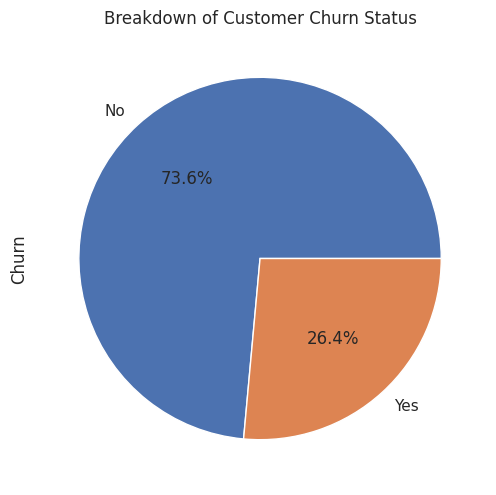

In [99]:
## Churn Status Breakdown

plt.figure(1, figsize=(10,6), dpi = 100);
plt.title("Breakdown of Customer Churn Status");
df_cleaned['Churn'].value_counts().plot.pie(autopct="%1.1f%%");
plt.savefig('EDA-churn-breakdown.png');

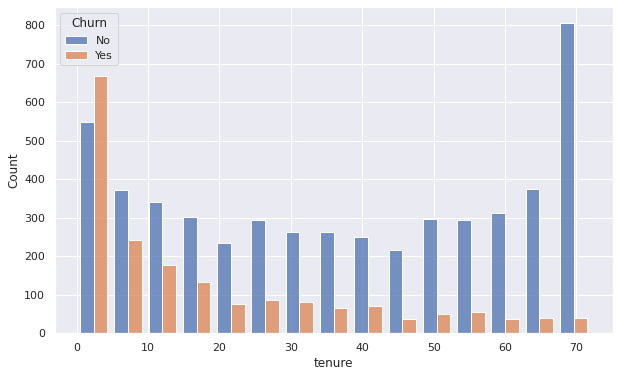

<Figure size 432x288 with 0 Axes>

In [100]:
## Churn vs Tenure

plt.figure(figsize=(10, 6));
sns.histplot(data=df_cleaned, x="tenure", hue="Churn", multiple="dodge", shrink=.8)
plt.show();
plt.savefig('EDA-churn-vs-tenure');

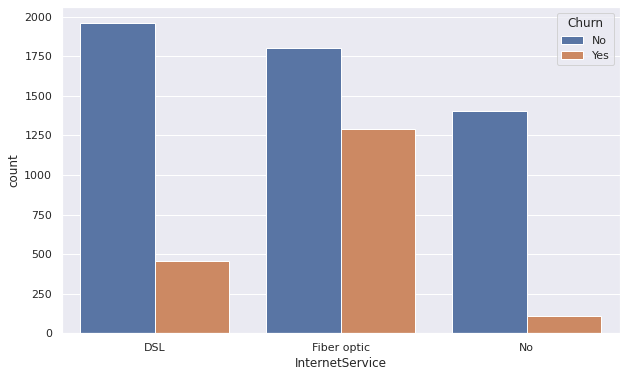

<Figure size 432x288 with 0 Axes>

In [101]:
## Churn vs InternetService

plt.figure(figsize=(10, 6));
sns.countplot(x='InternetService', hue='Churn', data=df_cleaned);
plt.show();
plt.savefig('EDA-churn-vs-internetService');

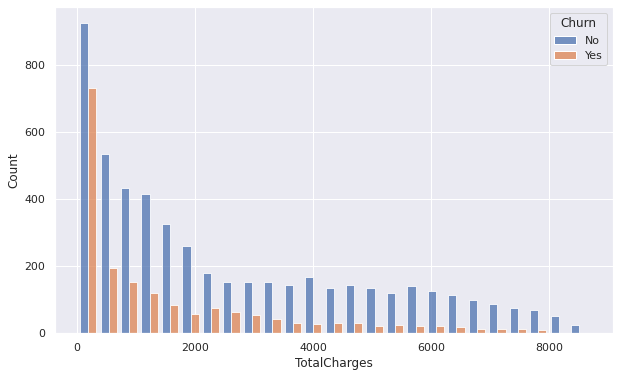

<Figure size 432x288 with 0 Axes>

In [102]:
## Churn vs TotalCharges

plt.figure(figsize=(10, 6));
sns.histplot(data=df_cleaned, x="TotalCharges", hue="Churn", multiple="dodge", shrink=.8)
plt.show()
plt.savefig('EDA-churn-vs-totalCharges');

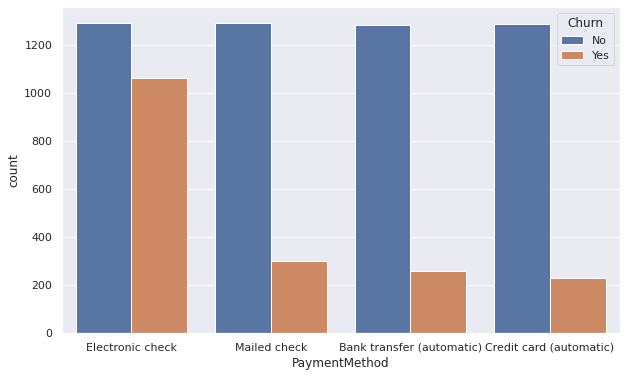

<Figure size 432x288 with 0 Axes>

In [103]:
## Churn vs PaymentMethod

plt.figure(figsize=(10, 6));
sns.countplot(x='PaymentMethod', hue='Churn', data=df_cleaned);
plt.show()
plt.savefig('EDA-churn-vs-paymentMethod');

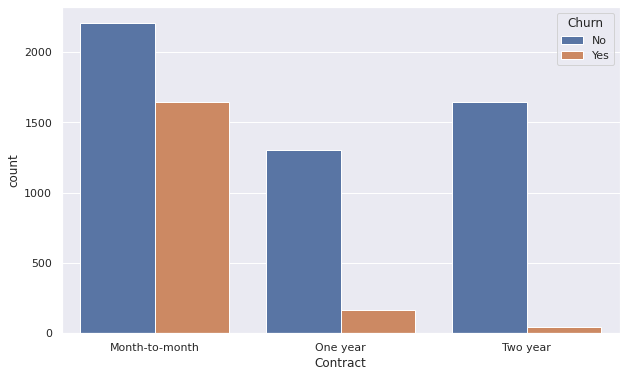

<Figure size 432x288 with 0 Axes>

In [104]:
## Churn vs Contract

plt.figure(figsize=(10, 6));
sns.countplot(x='Contract', hue='Churn', data=df_cleaned);
plt.show()
plt.savefig('EDA-churn-vs-contract');

## **5. Modeling & Evaluation**

In [105]:
###############################################
## Classification Models Evaluation Function ##
###############################################

def eval(model, X_test, y_test, y_pred):
  print(f'F1-score = {f1_score(y_test, y_pred).round(3)}')
  print(f'ROC Area under Curve = {roc_auc_score(y_test, y_pred).round(3)}')
  # print(f'Accuracy = {accuracy_score(y_test, y_pred).round(3)}')
  # print(classification_report(y_test, y_pred, digits=3))
  # plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.pink)
  # plot_roc_curve(model, X_test, y_test)

In [106]:
################################
## Logistic Regression  Model ##
################################

## Model
LR  = LogisticRegression(random_state=96);
LR = LR.fit(X_train, y_train);

## Predictions
y_pred_LR = LR.predict(X_test)

## Evaluation
eval(LR, X_test, y_test, y_pred_LR)

F1-score = 0.63
ROC Area under Curve = 0.766


In [107]:
######################################
##  k-nearest neighbors (KNN) Model ##
######################################

## Model
knn  = KNeighborsClassifier();
knn = knn.fit(X_train, y_train);

## Predictions
y_pred_knn = knn.predict(X_test)

## Evaluation
eval(knn, X_test, y_test, y_pred_knn)

F1-score = 0.556
ROC Area under Curve = 0.699


In [108]:
###################
## XGBoost Model ##
###################

## Model
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', nthread=1, random_state=96);
xgb = xgb.fit(X_train, y_train);

## Predictions
y_pred_xgb = xgb.predict(X_test)

## Evaluation
eval(xgb, X_test, y_test, y_pred_xgb)

F1-score = 0.614
ROC Area under Curve = 0.744


In [109]:
########################################
## Support Vector Machine (SVM) Model ##
########################################

## Model
svm  = SVC(random_state=96);
svm = svm.fit(X_train, y_train);

## Predictions
y_pred_svm = svm.predict(X_test)

## Evaluation
eval(svm, X_test, y_test, y_pred_svm)

F1-score = 0.619
ROC Area under Curve = 0.753


In [111]:
###########################################################
## Champion Model Optimization (i.e Logistic Regression) ##
###########################################################

## Model
LR  = LogisticRegression(random_state=96);

## Parameters
param_LR = {'penalty': ['l1', 'l2'],
            'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'solver': ['liblinear', 'saga']}

## Hyper-parameter tuning (Optimization)
gcv_LR = GridSearchCV(LR, param_LR, cv=5, verbose = 2, n_jobs = -1).fit(X_train, y_train);
print(f'\n\nGridSearchView Best Params: {gcv_LR.best_params_}\n\n')

## Optimized Predictions
y_pred_LR = gcv_LR.predict(X_test)

## Evaluation
eval(gcv_LR, X_test, y_test, y_pred_LR)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchView Best Params: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}


F1-score = 0.631
ROC Area under Curve = 0.767


## **6. Results**



<div align="center">


---------------------------------------------------------------------
---------------------------------------------------------------------
**Models Performance Summary**


|          Model             |      F1-Score         | AUC |
|--------------------------------|-------------------------------|--|
|<div align="center">LR</div>|<div align="center"><font color='green'>0.630</font></div>| <div align="center"><font color='green'>0.766</font></div> |
|<div align="center">KNN</div>|<div align="center"><font color='red'>0.556</font></div>| <div align="center"><font color='red'>0.699</font></div> |
|<div align="center">XGBoost</div>|<div align="center"><font color='red'>0.614</font></div>|<div align="center"><font color='red'>0.744</font></div>|
|<div align="center">SVM</div>|<div align="center"><font color='red'>0.619</font></div>|<div align="center"><font color='red'>0.753</font></div>|

</div>

<div align="center">

The **Logistic Regression** model shows **better** performance over the other models according to:

 **F1-Score (i.e. 0.631 after optimization)**
 
 **AUC (i.e. 0.767 after optimization)**

</div>

---------------------------------------------------------------------
---------------------------------------------------------------------

## **7. Conclusion:**

- By applying the **Logistic Regression** model, we will approximately tell **who may churn** with **F-score = 0.631** and **AUC = 0.767**.


- Thus, the marketing professionals can determine the **customers to target** through the retention campaign.

- **(i.e. reduced costs & efficient business decisions)**


## **Author**

- <a href="https://www.linkedin.com/in/ayman-altaweel" target="_blank">Ayman Altaweel - LinkedIn</a>

- <a href="https://github.com/Ayman947?tab=repositories" target="_blank">Ayman Altaweel - Github</a>
